In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

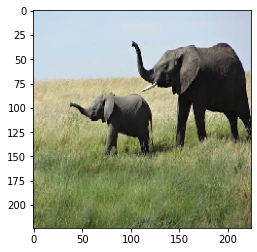

In [2]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from matplotlib.pyplot import imshow

img_path = '/content/creative_commons_elephant.jpg'

img = image.load_img(img_path, target_size=(224, 224))
imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [3]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.86371523), ('n01871265', 'tusker', 0.12614334), ('n02504013', 'Indian_elephant', 0.009943984)]


In [4]:
np.argmax(preds[0])

386

In [5]:
import keras
from keras import backend as K
import tensorflow as tf
#from keras import models
#tf.compat.v1.disable_eager_execution()



#grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
#pooled_grads = K.mean(grads, axis=(0, 1, 2))
#iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('block5_conv3')
    iterate = tf.keras.models.Model([model.input], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))


#pooled_grads_value, conv_layer_output_value = iterate([x])

#for i in range(512):
#    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

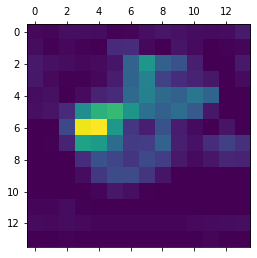

In [6]:
import matplotlib.pyplot as plt

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((14, 14))
plt.matshow(heatmap)

In [7]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('/content/elephant_cam.jpg', superimposed_img)

True

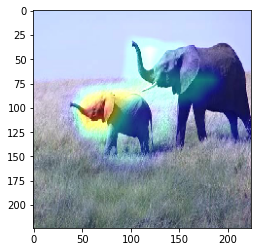

In [8]:
img_path_2= '/content/elephant_cam.jpg'

img = image.load_img(img_path_2, target_size=(224, 224))
imshow(img)